<a href="https://colab.research.google.com/github/latif-abdul/UAS_PCVK/blob/main/Bacteria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt

kernel = np.array([[0, 0, 1, 0, 0],
                   [0, 1, 1, 1, 0],
                   [1, 1, 1, 1, 1],
                   [0, 1, 1, 1, 0],
                   [0, 0, 1, 0, 0]], dtype=np.uint8)


def e_d(image, it):
    image = cv2.erode(image, kernel, iterations=it)
    image = cv2.dilate(image, kernel, iterations=it)
    return image


path = ('/content/drive/MyDrive/BD')
img_files = [file for file in os.listdir(path)]


def segment_index(index: int):
    segment_file(img_files[index])


def segment_file(img_file: str):
    img_path = path + "/" + img_file
    print(img_path)
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    th = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 11, 2)
    th = e_d(th.copy(), 1)

    cnt, hie = cv2.findContours(th, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    cntImg = th.copy()
    for contour in cnt:
        x, y, w, h = cv2.boundingRect(contour)
        if w > img.shape[1] / 2:
            continue
        cntImg = cv2.drawContours(cntImg, [cv2.convexHull(contour)], -1, 255, -1)

    cntImg = e_d(cntImg, 3)

    cnt2, hie2 = cv2.findContours(cntImg, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

    finalContours = []
    for contour in cnt2:

        (x, y), radius = cv2.minEnclosingCircle(contour)
        center = (int(x), int(y))
        radius = int(radius)

        circleImg = np.zeros(img.shape, dtype=np.uint8)
        circleImg = cv2.circle(circleImg, center, radius, 255, -1)

        contourImg = np.zeros(img.shape, dtype=np.uint8)
        contourImg = cv2.drawContours(contourImg, [contour], -1, 255, -1)

        union_inter = cv2.bitwise_xor(circleImg, contourImg)

        ratio = np.sum(union_inter == 255) / np.sum(circleImg == 255)

        if ratio > 0.55:
            finalContours.append(contour)

    finalContours = np.asarray(finalContours)

    bacteriaImg = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)

    for bacteria in finalContours:
        M = cv2.moments(bacteria)
        cx = int(M['m10'] / M['m00'])
        cy = int(M['m01'] / M['m00'])

        bacteriaImg = cv2.circle(bacteriaImg, (cx, cy), 5, (0, 0, 255), -1)

    plt.imshow(bacteriaImg)
    plt.show()

for i in range(len(img_files)):
    segment_index(i)

/content/drive/MyDrive/BD/.ipynb_checkpoints


error: ignored

In [ ]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

raw_image = cv2.imread('/content/drive/MyDrive/Bacteria/249.png')
plt.imshow(raw_image)
plt.show()

imgray = cv2.cvtColor(raw_image, cv2.COLOR_BGR2GRAY)

kernel = np.ones((7,7), np.uint8)
closing = cv2.morphologyEx(imgray, cv2.MORPH_CLOSE, kernel)

bilateral_filtered_image = cv2.bilateralFilter(closing, 10, 175, 175)
plt.imshow(bilateral_filtered_image)
plt.show()

edge_detected_image = cv2.Canny(bilateral_filtered_image, 200, 20)
plt.imshow(edge_detected_image)
plt.show()

contours, hierarchy = cv2.findContours(edge_detected_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

contour_list = []
for contour in contours:
    approx = cv2.approxPolyDP(contour,0.01*cv2.arcLength(contour,True),True)
    area = cv2.contourArea(contour)
    if ((len(approx) > 8) & (len(approx) < 23) & (area > 30) ):
        contour_list.append(contour)

cv2.drawContours(raw_image, contour_list,  -1, (255,0,0), 2)
plt.imshow(raw_image)
plt.show()

boxes = []
for ctr in contours:
    x, y, w, h = cv2.boundingRect(ctr)
    boxes.append([x, y, w, h])

for box in boxes:
    top_left     = (box[0], box[1])
    bottom_right = (box[0] + box[2], box[1] + box[3])
    cv2.rectangle(raw_image, top_left, bottom_right, (0,255,0), 2)

plt.imshow(raw_image)
plt.show()

import glob
list = glob.glob("/content/drive/MyDrive/Bacteria-20210610T013631Z-001/Bacteria/*.png")

In [ ]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

raw_image = cv2.imread('/content/drive/MyDrive/Bacteria/025.png')
plt.imshow(raw_image)
plt.show()


bilateral_filtered_image = cv2.bilateralFilter(raw_image, 50, 175, 175)
plt.imshow(bilateral_filtered_image)
plt.show()


edge_detected_image = cv2.Canny(bilateral_filtered_image, 100, 200)
plt.imshow(edge_detected_image)
plt.show()

contours, hierarchy = cv2.findContours(edge_detected_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)


contour_list = []
for contour in contours:
    approx = cv2.approxPolyDP(contour,0.01*cv2.arcLength(contour,True),True)
    area = cv2.contourArea(contour)
    if ((len(approx) > 8) & (len(approx) < 23) & (area > 30) ):
        contour_list.append(contour)

imgray = cv2.cvtColor(raw_image, cv2.COLOR_BGR2GRAY)

try: hierarchy = hierarchy[0]
except: hierarchy = []

height, width = imgray.shape
min_x, min_y = width, height
max_x = max_y = 0

# computes the bounding box for the contour, and draws it on the frame,
for contour, hier in zip(contours, hierarchy):
    (x,y,w,h) = cv2.boundingRect(contour)
    min_x, max_x = min(x, min_x), max(x+w, max_x)
    min_y, max_y = min(y, min_y), max(y+h, max_y)
    if w > 60 and h > 60:
        cv2.rectangle(imgray, (x,y), (x+w,y+h), (255, 255, 0), 3)

if max_x - min_x > 0 and max_y - min_y > 0:
    cv2.rectangle(imgray, (min_x, min_y), (max_x, max_y), (255, 0, 0), 2)

finalimg = cv2.cvtColor(imgray, cv2.COLOR_BGR2RGB)
plt.imshow(finalimg)
plt.show()



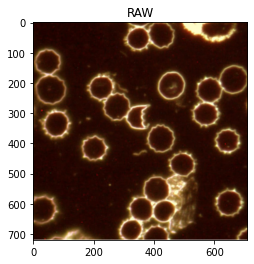

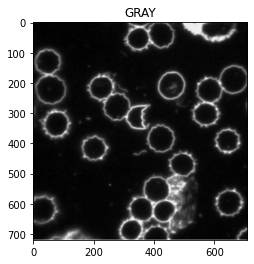

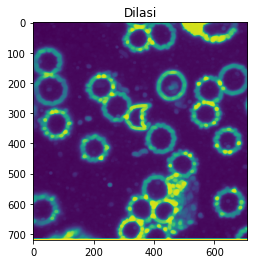

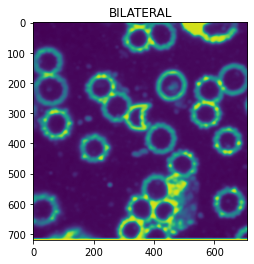

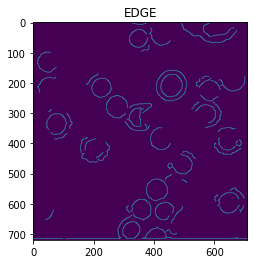

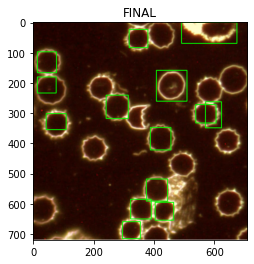

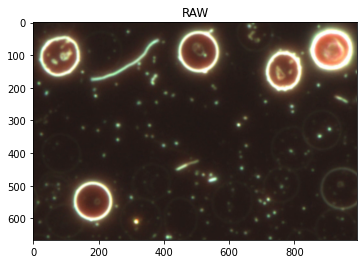

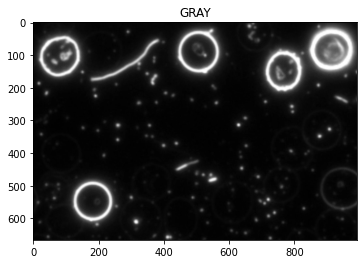

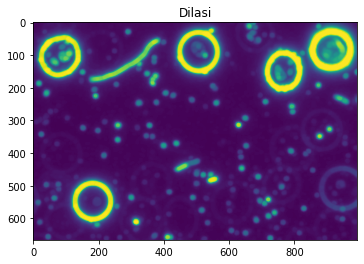

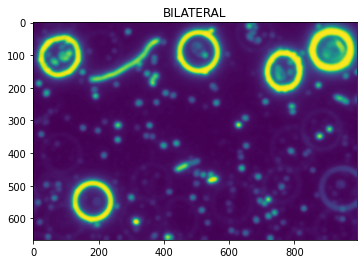

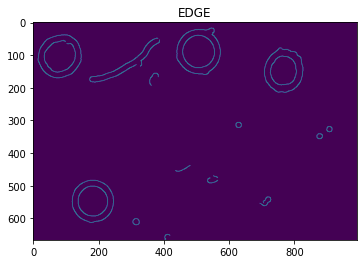

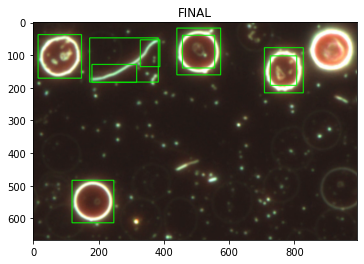

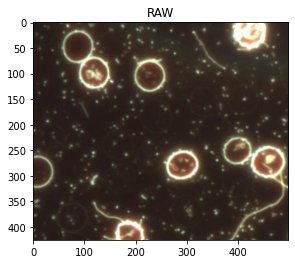

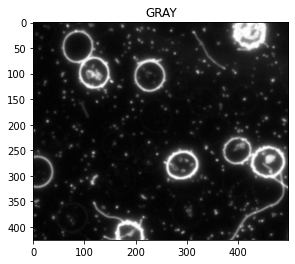

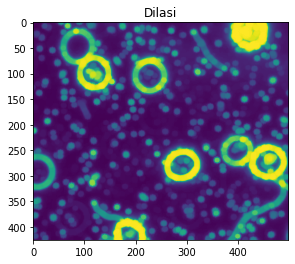

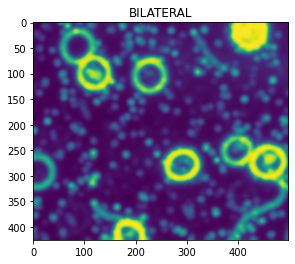

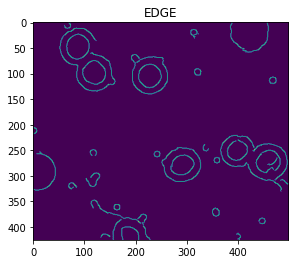

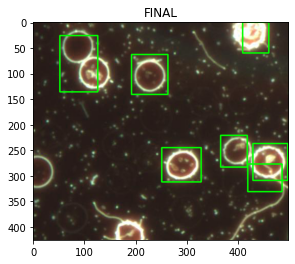

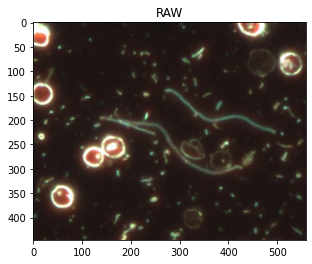

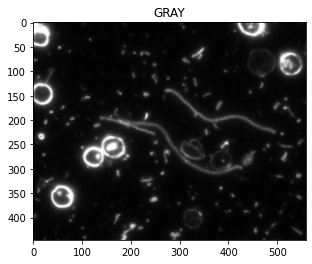

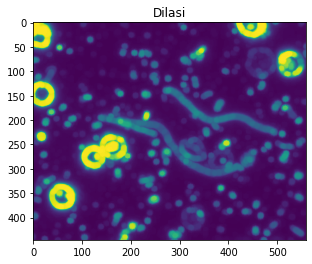

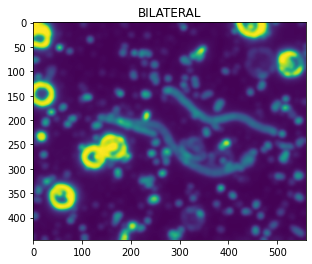

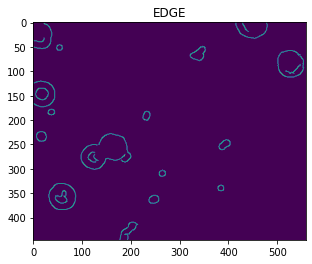

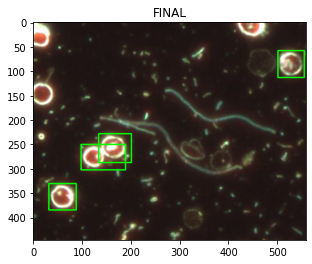

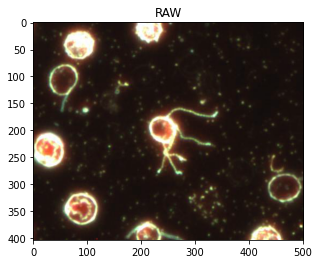

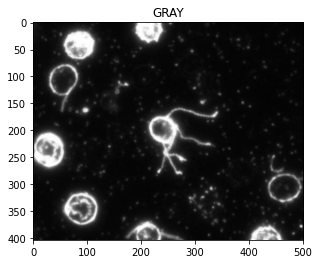

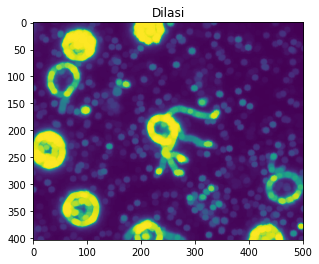

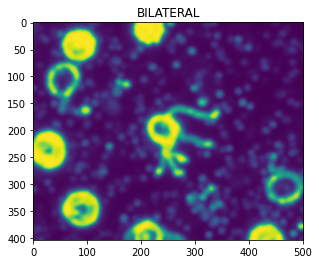

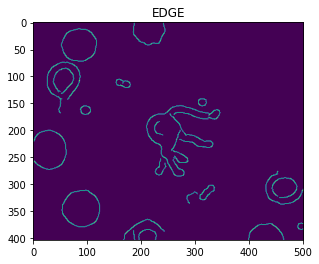

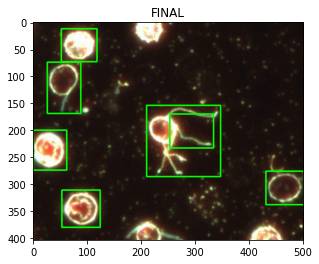

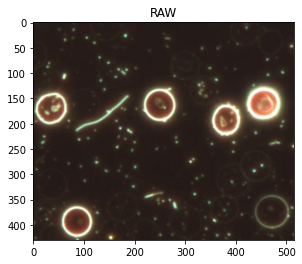

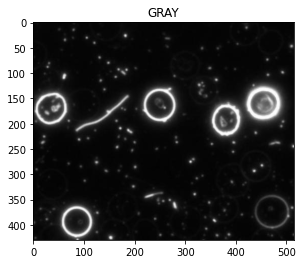

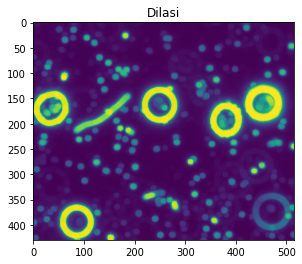

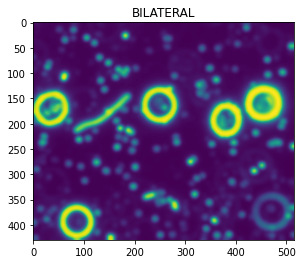

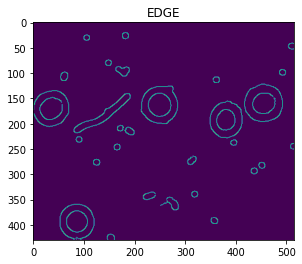

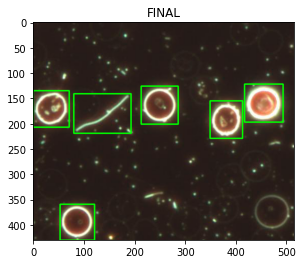

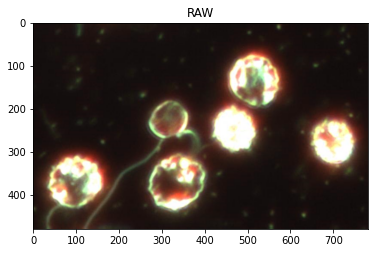

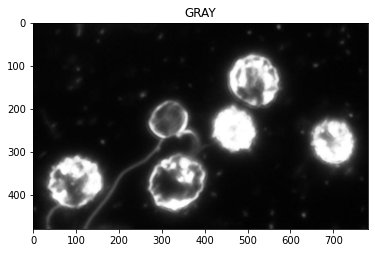

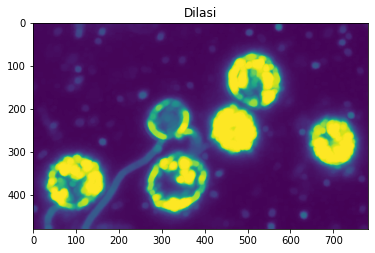

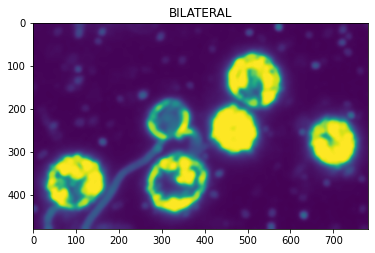

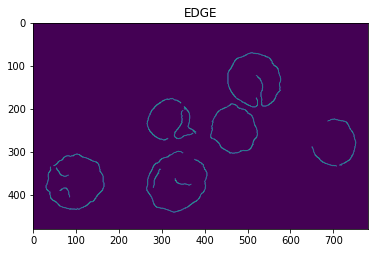

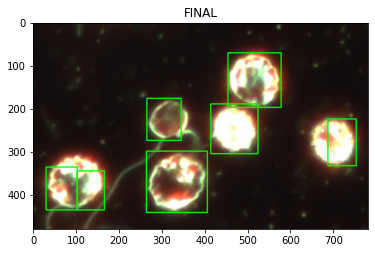

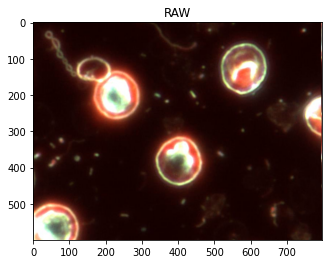

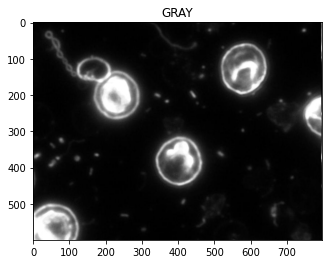

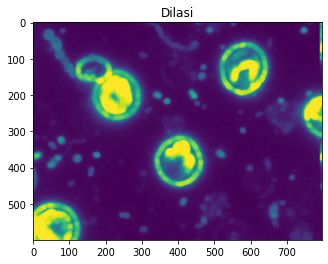

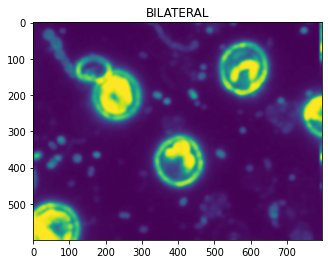

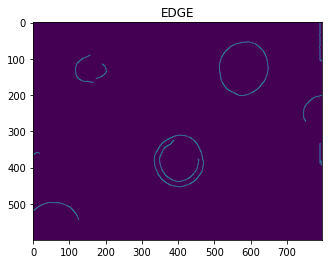

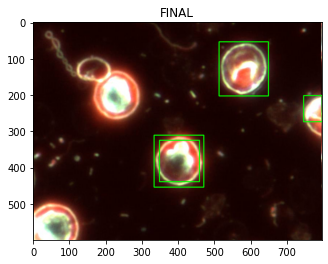

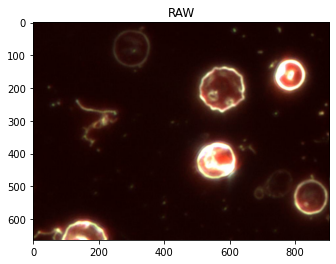

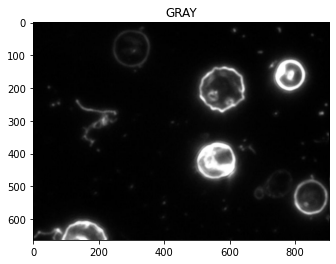

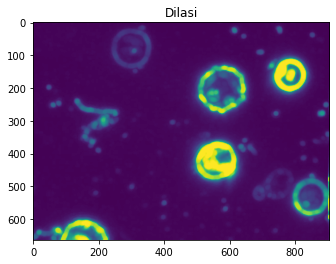

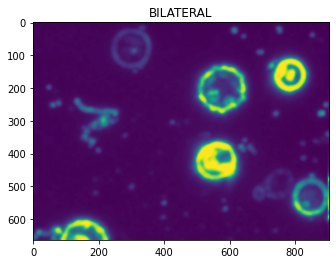

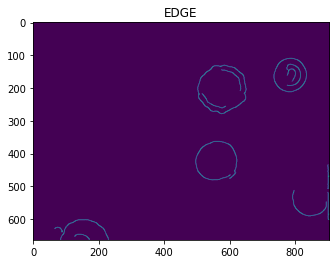

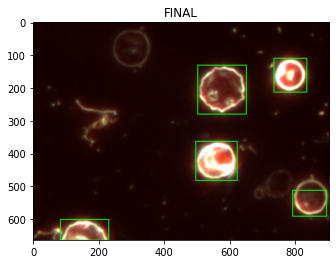

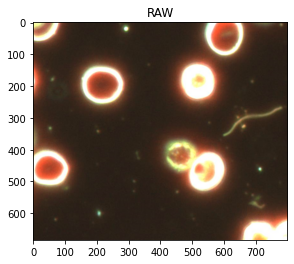

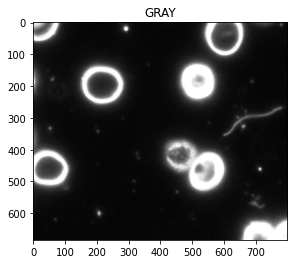

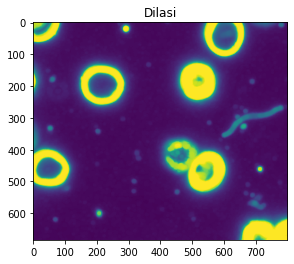

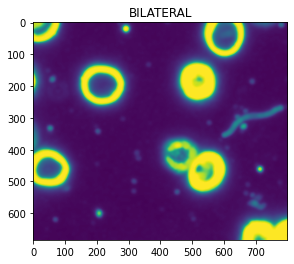

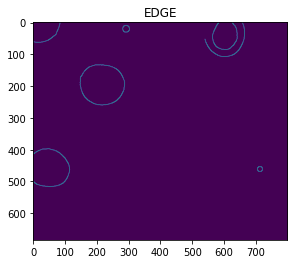

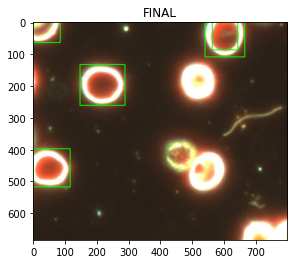

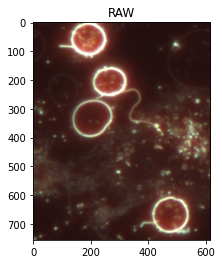

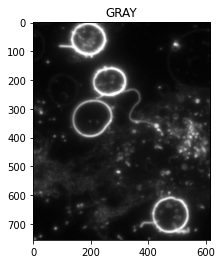

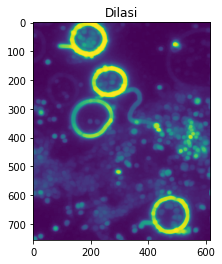

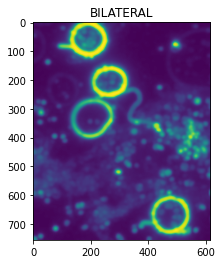

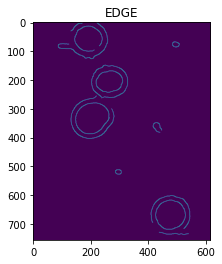

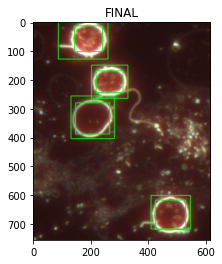

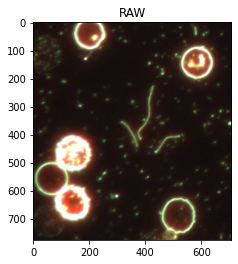

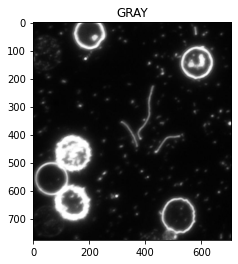

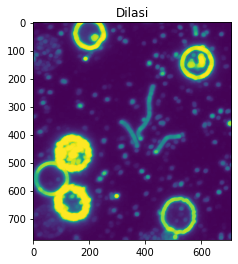

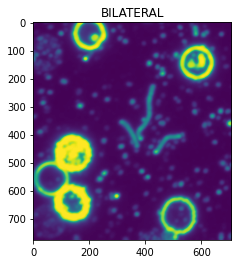

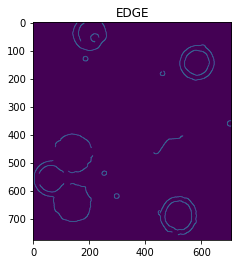

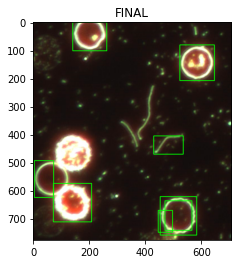

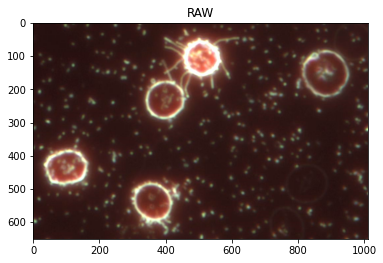

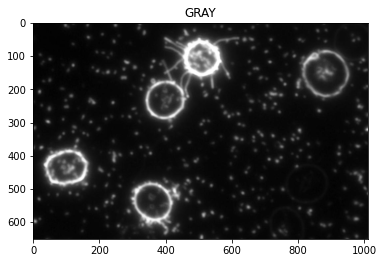

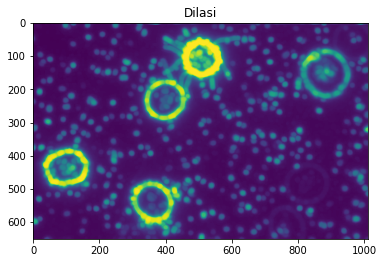

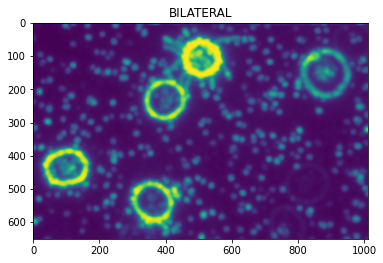

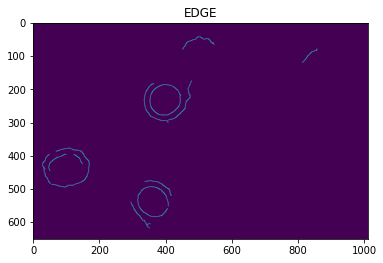

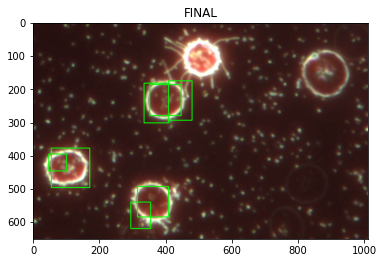

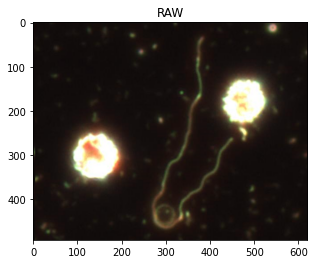

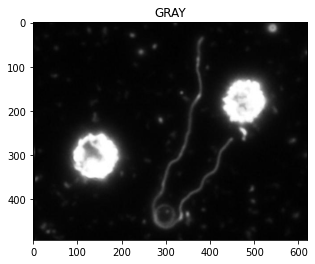

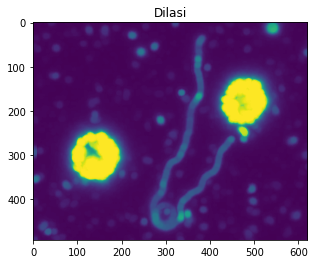

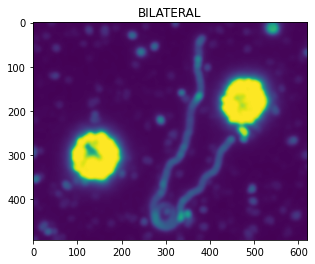

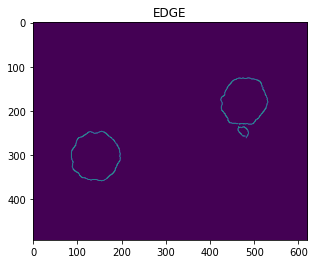

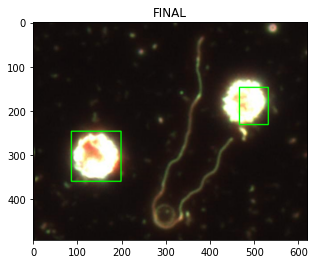

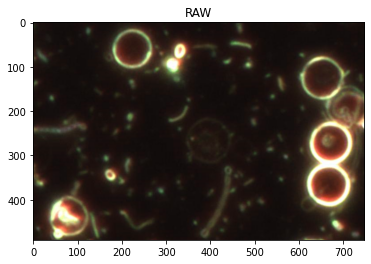

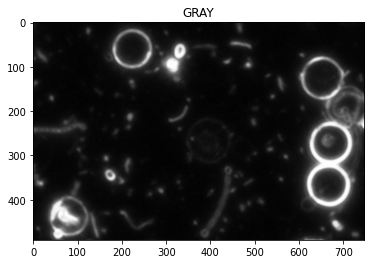

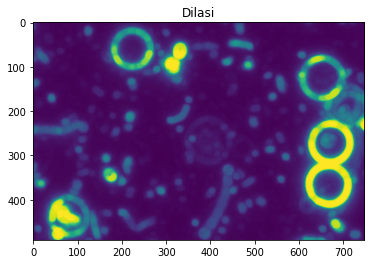

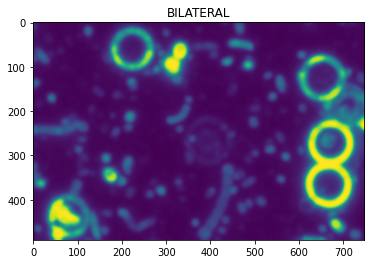

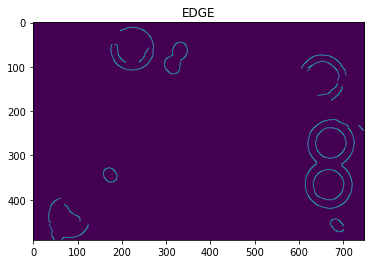

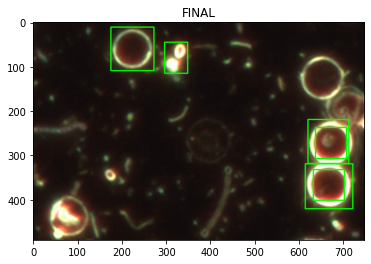

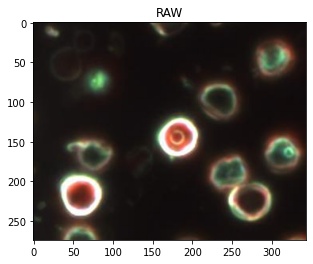

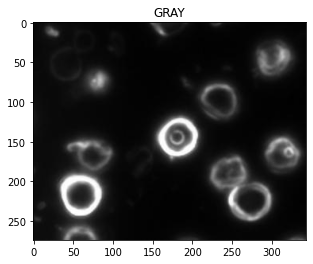

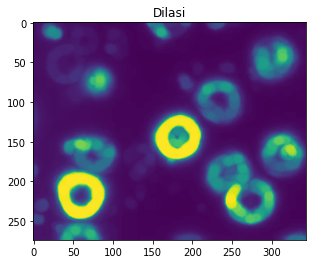

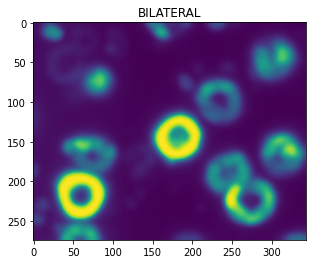

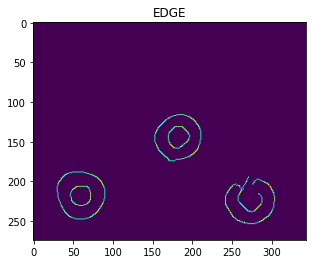

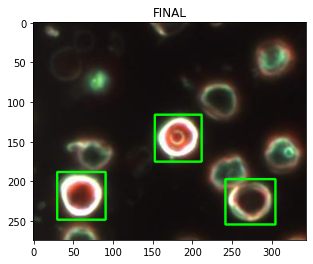

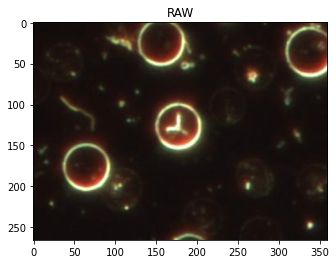

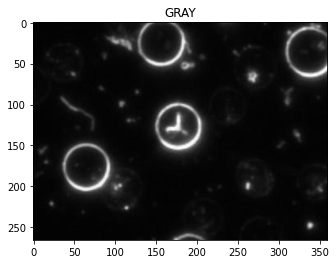

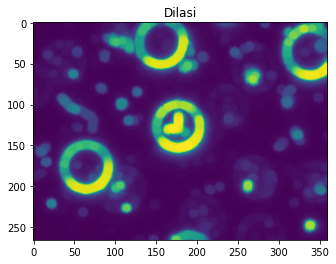

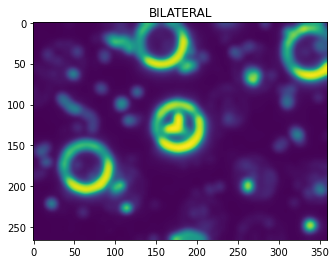

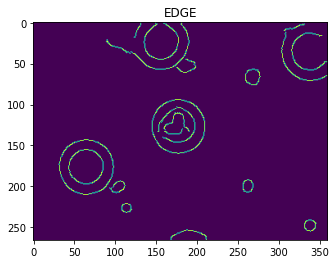

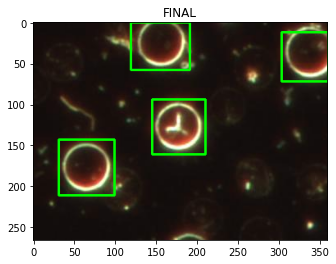

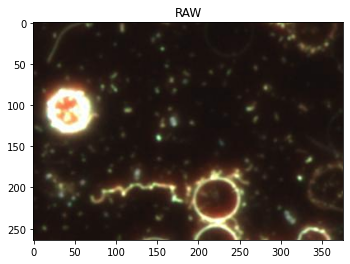

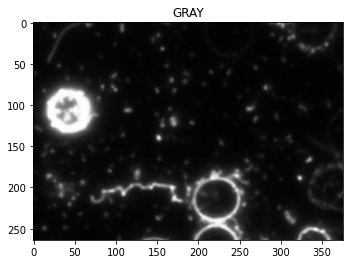

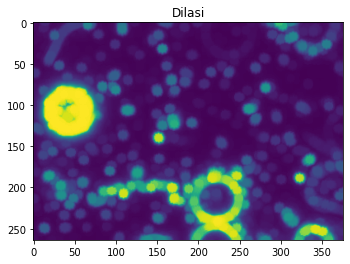

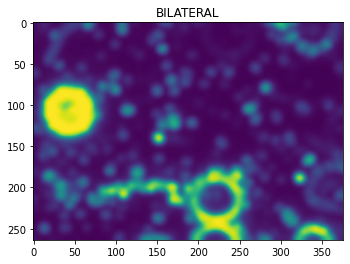

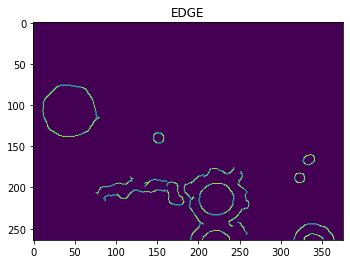

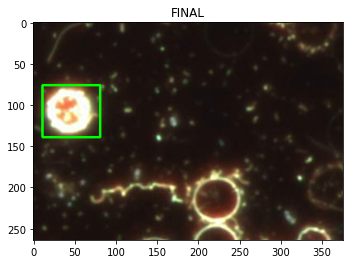

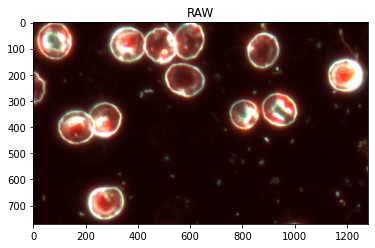

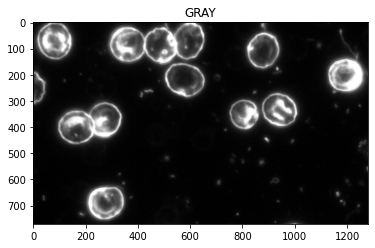

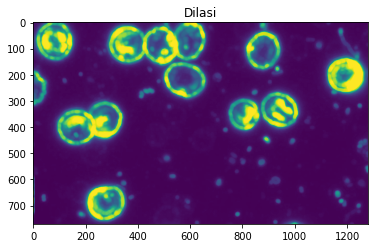

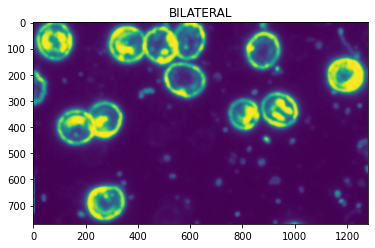

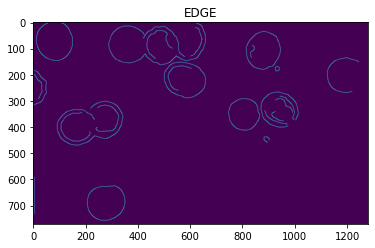

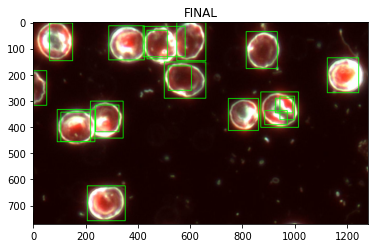

In [ ]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import glob
list = glob.glob("/content/drive/MyDrive/Bacteria/*.png")
for i in list:
  raw_image = cv2.imread(i)
  plt.title('RAW')
  plt.imshow(raw_image)
  plt.show()

  imgray = cv2.cvtColor(raw_image, cv2.COLOR_BGR2GRAY)
  plt.title('GRAY')
  plt.imshow(imgray, cmap='gray')
  plt.show()

  #kernel = np.ones((5,5), np.uint8)
  #closing = cv2.morphologyEx(imgray, cv2.MORPH_CLOSE, kernel)
  #plt.title('closing')
  #plt.imshow(closing)
  #plt.show()

  kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (9, 9))
  cross3 = cv2.morphologyEx(imgray, cv2.MORPH_DILATE, kernel)  
  plt.title('Dilasi')
  plt.imshow(cross3)
  plt.show()

  bilateral_filtered_image = cv2.bilateralFilter(cross3, 10, 175, 175)
  plt.title('BILATERAL')
  plt.imshow(bilateral_filtered_image)
  plt.show()

  edge_detected_image = cv2.Canny(bilateral_filtered_image, 200, 20)
  plt.title('EDGE')
  plt.imshow(edge_detected_image)
  plt.show()

  contours, hierarchy = cv2.findContours(edge_detected_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

  #contour_list = []
  #for contour in contours:
  #    approx = cv2.approxPolyDP(contour,0.01*cv2.arcLength(contour,True),True)
  #    area = cv2.contourArea(contour)
  #    if ((len(approx) > 8) & (len(approx) < 23) & (area > 30) ):
  #        contour_list.append(contour)

  #cv2.drawContours(raw_image, contour_list,  -1, (255,0,0), 2)
  #plt.title('COUNTOUR')
  #plt.imshow(raw_image)
  #plt.show()

  boxes = []
  for ctr in contours:
      x, y, w, h = cv2.boundingRect(ctr)
      boxes.append([x, y, w, h])

  for box in boxes:
      top_left     = (box[0], box[1])
      bottom_right = (box[0] + box[2], box[1] + box[3])
      if box[2] > 50 and box[3] > 50:
        cv2.rectangle(raw_image, top_left, bottom_right, (0,255,0), 2)
  
  plt.title('FINAL')
  plt.imshow(raw_image)
  plt.show()

